Adaboost算法练习  
说明：  
1.写代码时请先读完整体代码，了解整体思路和结构后再进行编程  
2.同学们可以阅读当前目录下的pdf文档，里面有关于本次任务的讲解  
3.代码的其他部分不需要更改，只需填充上所给出的代码块，否则会影响评判。  
  <b>需要填空的地方格式如下：  </b>  
  \###### start ######  

  \######  end  ######

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

![info](./info.webp)

# **Adaboost**

In [25]:

# Compute error rate, alpha and w
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation
    
    Note that all arrays should be the same length
    tips: can try to use np.not_equal(y, y_pred)
    '''
    ######### start ##########
    
    return np.sum(np.multiply(w_i,np.not_equal(y,y_pred))/np.sum(w_i))
    #########  end  ##########

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier. This is called
    alpha in chapter 10.1 of The Elements of Statistical Learning. Arguments:
    error: error rate from weak classifier m
    tips: can try to use np.log()
    '''
    ######### start ##########
    am=np.log((1-error)/error)
    return am
    #########  end  ##########

def update_weights(w_i, alpha, y, y_pred):
    ''' 
    Update individual weights w_i after a boosting iteration. Arguments:
    w_i: individual weights for each observation
    y: actual target value
    y_pred: predicted value by weak classifier  
    alpha: weight of weak classifier used to estimate y_pred
    tips: can try to use np.not_equal(y, y_pred) and np.exp()
    ''' 
    ######### start  ##########
    
    return np.multiply(w_i,np.exp(alpha*np.not_equal(y,y_pred)))
    #########  end  ##########



In [26]:
# Define AdaBoost class
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            ######### start ##########
            if m == 0:
                 w_i=np.array([1/len(X) for i in range(len(X))])/self.M # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i=update_weights(w_i, alpha_m, y, y_pred)
            #########  end  ##########
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)       #m-th weak classifier's predict 
            
            self.G_M.append(G_m) # Save to list of weak classifiers
            
            ######### start ##########
            # (b) Compute error
            error_m =compute_error(y,y_pred,w_i)  #use the function you have written
            #########  end  ##########
            
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)
    def predict(self, X):
        '''
        Predict using fitted model. Arguments:
        X: independent variables - array-like
        '''

        # Initialise dataframe with weak predictions for each observation
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        # Predict class label for each weak classifier, weighted by alpha_m
        for m in range(self.M):
            
            ######### start ##########
            y_pred_m =self.alphas[m]*self.G_M[m].predict(X)        #base on:(m-th weak classifier's predict:y_pred = G_m.predict(X))
            #########  end  ##########
            
            weak_preds.iloc[:,m] = y_pred_m   #each row corresponds to the ouput of m-th weak classifier

        # Calculate final predictions
        ######### start ##########
        y_pred =  np.sign(np.sum(weak_preds,axis=1))  
        #########  end  ##########

        return y_pred

# **Dataset**

In [27]:
df = pd.read_csv('./spambase.data', header = None)

# Column names
names = pd.read_csv('./spambase.names', sep = ':', skiprows=range(0, 33), header = None)
col_names = list(names[0])
col_names.append('Spam')

# Rename df columns
df.columns = col_names

# Convert classes in target variable to {-1, 1}
df['Spam'] = df['Spam'] * 2 - 1

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Spam').values, 
                                                    df['Spam'].values, 
                                                    train_size = 3065, 
                                                    random_state = 2) 

In [28]:
print('Shape of data:', df.shape) 
df.tail()

Shape of data: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,-1
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,-1
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,-1
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,-1
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,-1


In [29]:
print(X_train.shape)#each row represents a sample,each sample has 57 features
print(y_train.shape)#the label of train dataset

(3065, 57)
(3065,)


# **result**

In [30]:
# Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)#you can set different M(to get different pictures)

# Predict on test set
y_pred = ab.predict(X_test)
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score of the model is: 0.9399


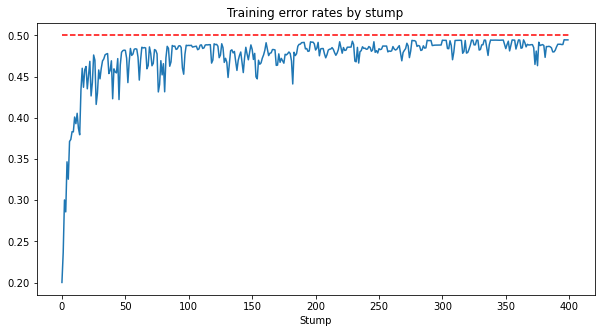

In [31]:
# Error rates during training
plt.figure(figsize=(10,5))
plt.plot(ab.training_errors)
plt.hlines(0.5, 0, 400, colors = 'red', linestyles='dashed')
plt.title('Training error rates by stump')
plt.xlabel('Stump')
plt.show()

In [32]:
print('Error rate of metaclassifier:', round(compute_error(y_test, y_pred, np.ones(len(y_test))), 4))

Error rate of metaclassifier: 0.056
